In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.io import arff
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import os, shutil
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

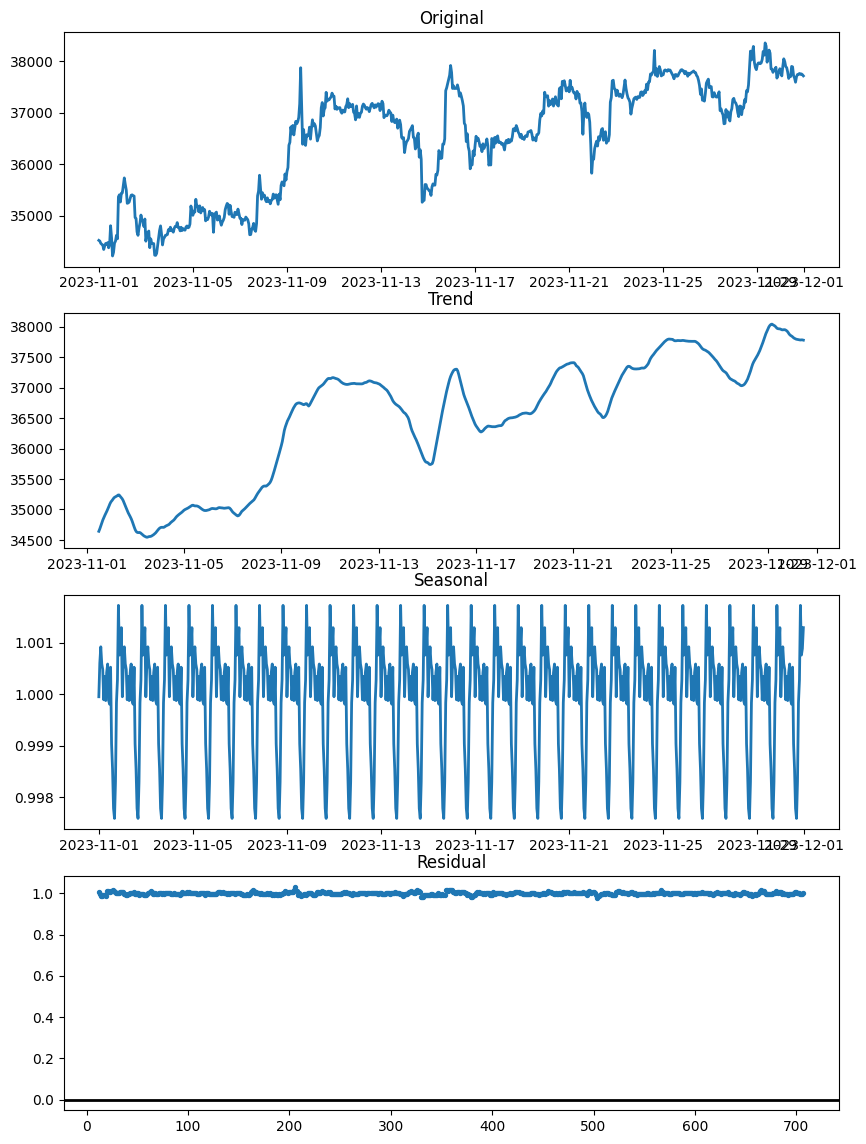

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
# load dataset
# file_list=['BTCUSD-all','BTCUSD-N2Y','BTCUSD-N4Y',
#            'ETHUSD-all','ETHUSD-N2Y','ETHUSD-N4Y',           
#            'USDTUSD-all','USDTUSD-N2Y','USDTUSD-N4Y',  
#            'BNBUSD-all','BNBUSD-N2Y','BNBUSD-N4Y']



# file_list=['BTCUSD-1m1h','ETHUSD-1m1h','USDTUSD-1m1h','BNBUSD-1m1h']



# google stock price is daily, so
df=pd.read_csv('../Data/BTCUSD-1m1h.csv')        
#df['Close'] = np.log(df['Close'])

df["Date"] = pd.to_datetime(df["Date"])
# Decompose the 'Close' column #multiplicative or additive
Mmodel='multiplicative'
decomposition = seasonal_decompose(df['Close'], model=Mmodel, period=24)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
fig, axes = plt.subplots(4, 1, figsize=(10, 14))  # Set the figure size

# Plot the original series
axes[0].plot(df["Date"],df['Close'], linewidth=2)  # Set the line width (point size)
axes[0].set_title('Original')

# Plot the trend component
axes[1].plot(df["Date"],trend, linewidth=2)
axes[1].set_title('Trend')

# Plot the seasonal component
axes[2].plot(df["Date"],seasonal, linewidth=2)
axes[2].set_title('Seasonal')

# Plot the residual component
axes[3].scatter(residual.index, residual, s=8)
axes[3].axhline(y=0, color='k', linestyle='-', linewidth=2)  # Horizontal line at y=0
axes[3].set_title('Residual')
plt.show()